# Run scAge Notebook

This notebook demonstrates how to execute the core function of the framework, run_scAge. This function takes as input processed binary methylation matrices and a reference dataset of bulk-derived models, and outputs predicted epigenetic ages for single cells. <br><br> Three processed single-cell methylation profiles from the [(Gravina et al, 2016)](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-016-1011-3) study are provided as an example in `sc_data_processed`, and a pre-processed C57BL/6J liver reference dataset from the [(Thompson et al, 2018)](https://www.aging-us.com/article/101590/text) study is provided in `train`.

## Load required packages

In [4]:
import numpy as np
import pandas as pd
import os
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import scAge

## Check single-cell and reference data

In [6]:
# check single-cell data
sc_directory = "./sc_data_processed/"
print("Single-cell input path: '%s'" % sc_directory)
sc_methylome_profiles = sorted(os.listdir(sc_directory))
for count, profile in enumerate(sc_methylome_profiles):
    print("\tSingle-cell profile #%s: %s" % (count, profile))
      
# check bulk training data
train_directory = "./train/"
reference_file = "Thompson_Liver_BL6.tsv.gz"
full_reference_path = train_directory + reference_file
print("\nTraining reference data input path: %s" % full_reference_path)

# denote an output path
output_path = "./predictions/"
print("\nOutput path: '%s'" % output_path)

Single-cell input path: './sc_data_processed/'
	Single-cell profile #0: SRR3136627.tsv.gz
	Single-cell profile #1: SRR3136628.tsv.gz
	Single-cell profile #2: SRR3136659.tsv.gz

Training reference data input path: ./train/Thompson_Liver_BL6.tsv.gz

Output path: './predictions/'


## Run scAge

In [12]:
import importlib
importlib.reload(scAge)
scAge.run_scAge(single_cell_dir_or_dict = sc_directory,
                single_cell_set_name = "Gravina_Test",
                reference_data = full_reference_path,
                selection_mode = "percentile",
                CpG_parameter = 1,
                zero_met_replacement = 0.001,
                one_met_replacement = 0.999,
                min_age = -20,
                max_age = 60,
                age_step = 0.1,
                n_cores = 3,
                uncertainty = 1,
                output_path = output_path,
                chunksize = 1)

scAge algorithm starting!

----------------------------------------------------------
Profiling epigenetic age in 'Gravina_Test' single-cell data...
Loading processed binary methylation files from './sc_data_processed/'...
Number of single cells to analyze: 3
----------------------------------------------------------

scAge parameters:
----------------------------------------------------------
Using reference training data: Thompson_Liver_BL6
Shape of reference matrix: 743,078 CpGs, 4 columns


Using 3 cores with chunksize of 1


Setting minimum age to -20 month(s)
Setting maximum age to 60 month(s)
Using age step of 0.1 month(s)


Replacing modeled bulk methylation ≤ 0 with 0.001
Replacing modeled bulk methylation ≥ 1 with 0.999


Using profiling mode: percentile
--> Profiling top 1% age-related CpGs by absolute Pearson correlation 

Using a prediction uncertainty metric of +/- 1 for interval computation
----------------------------------------------------------


--------------------

scAge progress :   0%|          | 0/3 [00:00<?, ? age predictions/s]




Predictions stored in './predictions/'
----------------------------------------------------------

Time elapsed to generate scAge results = 24.206 seconds

scAge run complete!


## Load in predictions

In [13]:
output_files = sorted(os.listdir(output_path))
counter = 1
print("Output files generated:")
for file in output_files:
    if ".tsv" in file:
        print(str(counter) + ") " + file)
        counter += 1

# load in predictions
test_predictions = pd.read_csv(output_path + \
                               "Gravina_Test-train(Thompson_Liver_BL6)-mode(percentile)-param(top_1_pct).tsv",
                               sep = "\t",
                               index_col = 0)

# load in metadata
meta_path = "./meta/Gravina_meta.tsv"
meta = pd.read_csv("./meta/Gravina_meta.tsv",
                   sep = "\t", index_col = 0)

# getting final dataframe
test_predictions = test_predictions.join(meta)
test_predictions

Output files generated:
1) Gravina_Test-train(Thompson_Liver_BL6)-mode(percentile)-param(top_1_pct).tsv


,PredictedAge,MeanMet,CellCoverage,Intersections,AgesTested,AgeLikelihood,SelectedCpGs,NumberCpGs,Correlations,RegressionCoefs,...,MethylationValues,LowerBound,UpperBound,Sample Name,Tissue,Age(str),Age(num),Type,Animal,Tissue-Age
Cell,,,,,,,,,,,,,,,,,,,,,
SRR3136627,0.5,0.663169,3914949,1089,"[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19...","[-794.5561616724849, -792.6667390234271, -790....","['chr1_10993876', 'chr1_15286811', 'chr1_15286...",1089,"[0.6734012740470863, 0.7663077503375164, 0.840...","[0.0015295468162764, 0.0021379659894545, 0.004...",...,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...",-0.6,1.8,f21,MEF,NaN,NaN,singleCell,f2,MEF
SRR3136628,25.0,0.695256,2511084,743,"[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19...","[-1203.8373223349383, -1198.8560654898824, -11...","['chr1_15286784', 'chr1_15286794', 'chr1_15286...",743,"[0.6487866333357658, 0.6310230772541805, 0.766...","[0.0009022742447572, 0.0018980059830089, 0.002...",...,"[0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, ...",22.7,27.2,o11,Hepatocyte,26 month,26.0,singleCell,o1,Hepatocyte\n(26 month)
SRR3136659,4.0,0.683454,799350,222,"[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19...","[-218.81037904573677, -218.4019443960503, -218...","['chr1_36075060', 'chr1_36075085', 'chr1_36075...",222,"[0.6770777230910194, 0.7357133733199889, 0.700...","[0.0106333550428009, 0.0125863513919236, 0.010...",...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",0.6,7.8,y21,Hepatocyte,4 month,4.0,singleCell,y2,Hepatocyte\n(4 month)


## Plot predictions

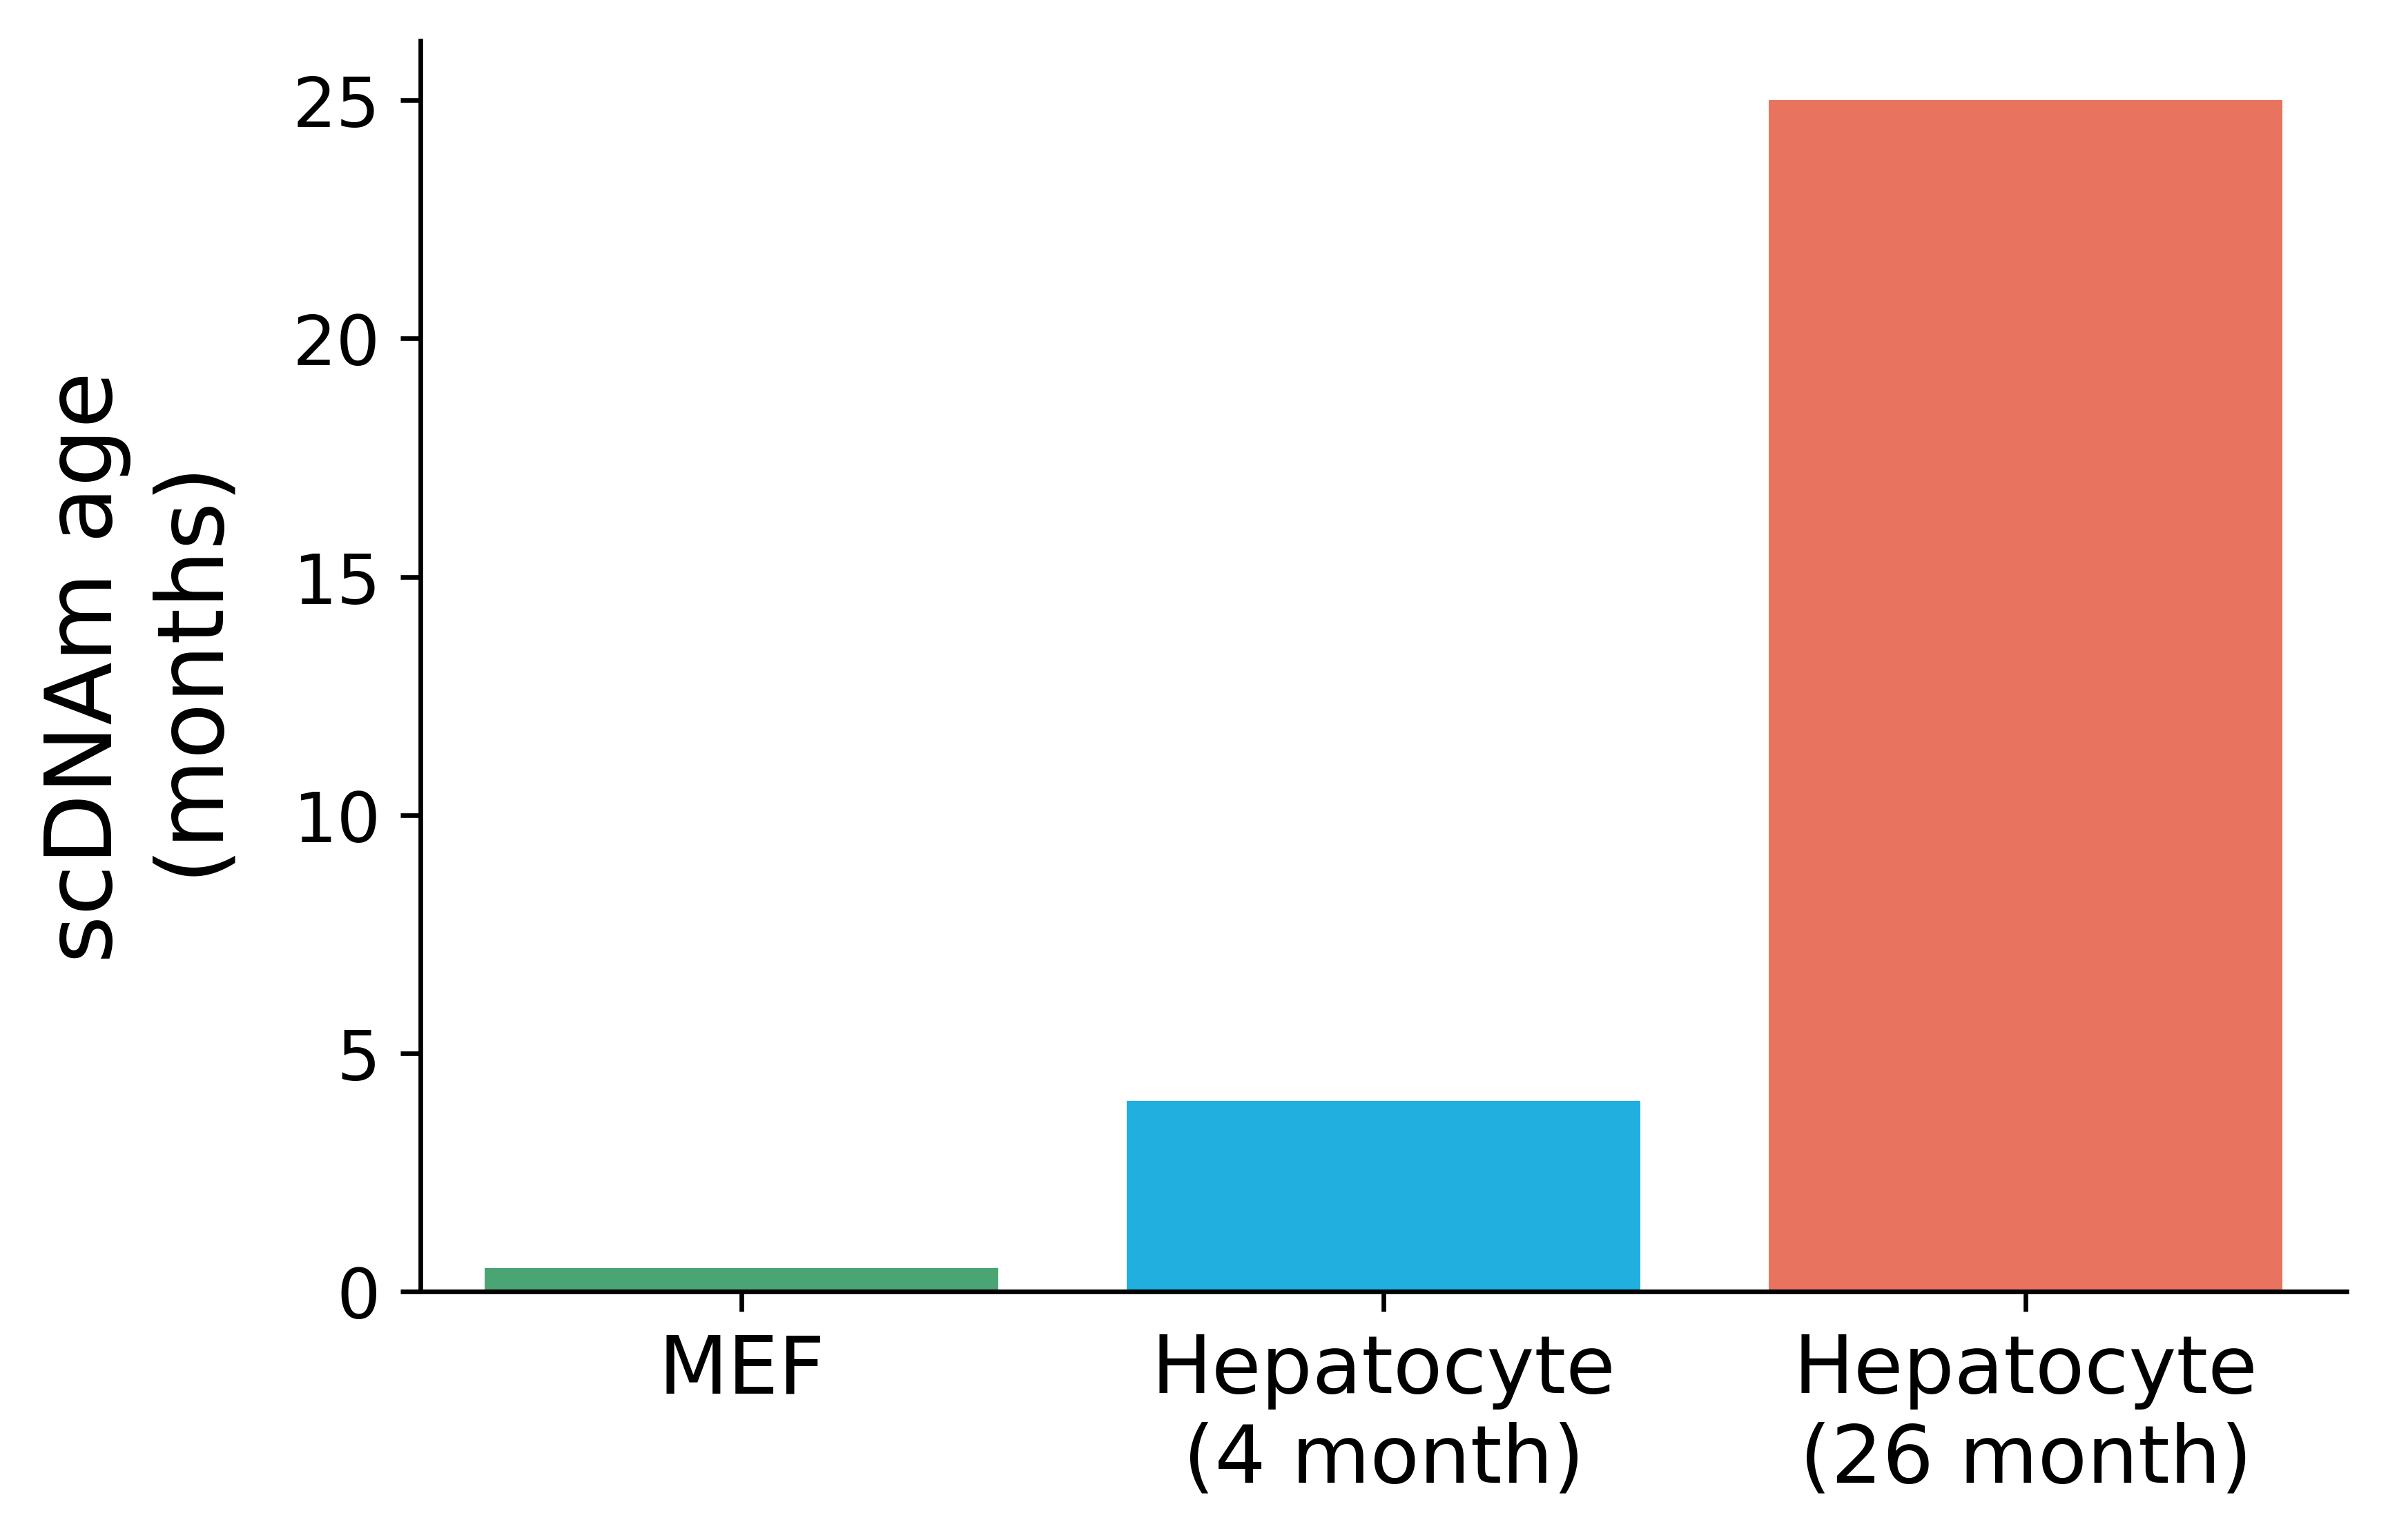

In [14]:
# plot predicted ages
fig, ax = plt.subplots(dpi = 600)
sns.barplot(x = "Tissue-Age",
            y = "PredictedAge",
            data = test_predictions,
            order = ["MEF", "Hepatocyte\n(4 month)", "Hepatocyte\n(26 month)"],
            palette = ["mediumseagreen", "deepskyblue", "tomato"]);
sns.despine()
plt.ylabel("scDNAm age\n(months)", fontsize = 16, labelpad = 10)
plt.xlabel("")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 12);